In [43]:
import pandas as pd
import jinja2
from sklearn import tree
from sklearn.preprocessing import scale as scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Data preperation and knowledge

In [44]:
# read the csv file
match_data_unfiltered = pd.read_csv("preprocessed_dataframe_with_elo_mw_form_3.csv")
# match_data_unfiltered.to_excel("exel_test.xlsx")

In [45]:
# make FTR column to continous variable
def convert_ftr(result: str):
    if result == "D":
        return 1
    elif result == "H":
        return 2
    elif result == "A":
        return 0
    else: 
        return None
match_data_unfiltered['FTR'] = match_data_unfiltered['FTR'].apply(convert_ftr)

In [46]:
match_data_unfiltered = match_data_unfiltered.drop(["Unnamed: 0"], axis=1, errors="ignore")
# print(match_data_unfiltered.columns)
match_data_unfiltered.iloc[4589:4594].tail(n=5)

,Unnamed: 0.2,index,Unnamed: 0.1,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,...,QuotAttack,QuotDefend,DirectComparisonHG,DirectComparisonAG,B365Prediction,BetTrue,IWPrediction,BetTrueIW,DirectComparisonGoalDiff,DirectComparisonGoalQuot
4589,4589,4589,4589,D1,22/05/2021,Wolfsburg,Mainz,2,3,0,...,1.154804,1.267976,2.0,0.0,H,False,H,False,2.0,inf
4590,4590,4590,4590,D1,13/08/2021,M'gladbach,Bayern Munich,1,1,1,...,0.677409,1.498934,1.4,3.2,A,False,A,False,-1.8,0.437500
4591,4591,4591,4591,D1,14/08/2021,Augsburg,Hoffenheim,0,4,0,...,0.286204,4.737221,1.6,2.6,A,True,A,True,-1.0,0.615385
4592,4592,4592,4592,D1,14/08/2021,Bielefeld,Freiburg,0,0,1,...,0.335041,0.064789,0.8,1.5,A,False,A,False,-0.7,0.533333
4593,4593,4593,4593,D1,14/08/2021,Stuttgart,Greuther Furth,5,1,2,...,2.563037,0.407930,1.1,1.2,H,True,H,True,-0.1,0.916667


In [47]:
# print correlation matrix
correlation_matrix_match_data_unfiltered = match_data_unfiltered.corr()[['FTR', 'FTHG', 'FTAG']]
correlation_matrix_match_data_unfiltered = correlation_matrix_match_data_unfiltered.dropna()
correlation_matrix_match_data_unfiltered = correlation_matrix_match_data_unfiltered.iloc[6:]
correlation_matrix_match_data_unfiltered.style.background_gradient()

,FTR,FTHG,FTAG
HTHG,0.425434,0.691083,-0.077238
HTAG,-0.439499,-0.066105,0.681759
HS,0.189774,0.282759,-0.110333
AS,-0.201513,-0.121474,0.297404
HST,0.354642,0.529431,-0.118181
AST,-0.369956,-0.122165,0.534106
HF,-0.043109,-0.110952,-0.010506
AF,0.004917,-0.079891,-0.051651
HC,-0.007333,0.024723,-0.042649
AC,-0.040962,-0.068897,0.063109


In [48]:
# filter for specific columns
# match_data_reduced = match_data_unfiltered.loc[:, ["FTR", "FTHG", "FTAG", "HomeElo", "AwayElo", "HomeAttack", "HomeDefend", "AwayAttack", "AwayDefend"]]
# "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    # "AwayAttackOld", "AwayDefendOld"
# print correlation matrix
match_data_reduced = match_data_unfiltered.loc[:, ["FTR", "FTHG", "FTAG", "HomeEloOld", "AwayEloOld", "DiffEloOld", "HomeAttackOld", "HomeDefendOld", "AwayAttackOld", "AwayDefendOld", "DiffDefendOld", "DiffAttackOld", "MarketValueDiff", "PDiff3Matches", 'PDiffAllMatches', 'DirectComparisonGoalDiff', 'DirectComparisonGoalQuot', 'DirectComparisonHG', 'DirectComparisonAG']]

correlation_matrix_match_data_reduced = match_data_reduced.corr()[['FTR', 'FTHG', 'FTAG']]
correlation_matrix_match_data_reduced.style.background_gradient()

,FTR,FTHG,FTAG
FTR,1.000000,0.632818,-0.652825
FTHG,0.632818,1.000000,-0.115890
FTAG,-0.652825,-0.115890,1.000000
HomeEloOld,0.100912,0.165829,-0.028317
AwayEloOld,-0.115695,-0.045695,0.149910
DiffEloOld,0.265837,0.259707,-0.218648
HomeAttackOld,0.175902,0.210148,-0.090111
HomeDefendOld,0.108135,0.099480,-0.068295
AwayAttackOld,-0.151120,-0.090360,0.168209
AwayDefendOld,-0.092621,-0.084673,0.084305


In [49]:
match_data_bl = match_data_unfiltered.copy(deep=True)
# match_data_bl = match_data_bl.dropna(subset=["PDiff3Matches"])
# match_data_unfiltered = match_data_unfiltered.dropna(subset=["PDiff10Matches"])

In [50]:
# X = match_data_unfiltered.loc[:, ["HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
#     "AwayAttackOld", "AwayDefendOld"
# ]]
features = ["DiffEloOld", "DiffAttackOld", "DiffDefendOld", "PDiff3Matches", "PDiff10Matches", "PQuotAllMatches", 
            "MarketValueDiff", "DirectComparisonHG", "DirectComparisonAG"]
#  "PDiff10Matches",
match_data_bl_wo_nan = match_data_bl.dropna(subset=features)
X = match_data_bl_wo_nan.loc[:, features]
X_scaled = scale(X)
# y = match_data_unfiltered.loc[:, ["FTHG", "FTAG"]]
y = match_data_bl_wo_nan.loc[:, ["FTR"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)


## Train Decision Tree Classifier as first Model

In [51]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [52]:
clf_scaled = tree.DecisionTreeClassifier()
clf_scaled = clf_scaled.fit(X_train_scaled, y_train)

In [53]:
clf.predict(X_test)

array([0, 2, 1, ..., 1, 1, 0], dtype=int64)

In [54]:
clf_scaled.predict(X_test_scaled)

array([2, 2, 1, ..., 1, 1, 0], dtype=int64)

In [55]:
result = clf.score(X_test, y_test)
result_scaled = clf_scaled.score(X_test_scaled, y_test)

In [56]:
result

0.42068361086765993

In [57]:
result_scaled

0.4145486415425066

Confusion matrix, without normalization
[[135  95 127]
 [ 69  65 134]
 [116 120 280]]
Normalized confusion matrix
[[0.37815126 0.26610644 0.3557423 ]
 [0.25746269 0.24253731 0.5       ]
 [0.2248062  0.23255814 0.54263566]]


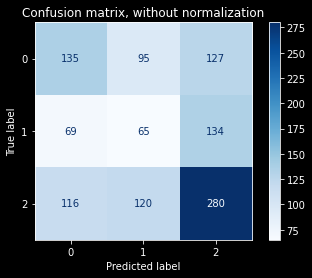

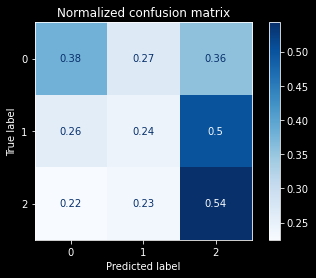

In [58]:
class_names = {
    'Away'
    ,'Draw',
    'Home'
}
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        #display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Ensemble Learning

In [59]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
from sklearn import linear_model

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [60]:
# X = match_data_unfiltered.loc[:, [
#     "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
#     "AwayAttackOld", "AwayDefendOld"
# ]]

# y = match_data_unfiltered.loc[:, ["FTR"]]

In [61]:
match_data_unfiltered

,Unnamed: 0.2,index,Unnamed: 0.1,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,...,QuotAttack,QuotDefend,DirectComparisonHG,DirectComparisonAG,B365Prediction,BetTrue,IWPrediction,BetTrueIW,DirectComparisonGoalDiff,DirectComparisonGoalQuot
0,0,0,0,D1,11/08/06,Bayern Munich,Dortmund,2,0,2,...,2.215589,0.411358,NaN,NaN,H,True,H,True,NaN,NaN
1,1,1,1,D1,12/08/06,Hamburg,Bielefeld,1,1,1,...,0.982162,0.982162,NaN,NaN,H,False,H,False,NaN,NaN
2,2,2,2,D1,12/08/06,Leverkusen,Aachen,3,0,2,...,2.878939,0.324259,NaN,NaN,H,True,H,True,NaN,NaN
3,3,3,3,D1,12/08/06,Mainz,Bochum,2,1,2,...,1.401889,0.718342,NaN,NaN,H,True,H,True,NaN,NaN
4,4,4,4,D1,12/08/06,M'gladbach,Cottbus,2,0,2,...,2.215589,0.411358,NaN,NaN,H,True,H,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,4891,4891,4891,D1,14/05/2022,Mainz,Ein Frankfurt,2,2,1,...,1.707233,1.191627,1.0,1.0,H,False,H,False,0.0,1.000000
4892,4892,4892,4892,D1,14/05/2022,M'gladbach,Hoffenheim,5,1,2,...,2.032081,0.266797,1.6,1.4,H,True,H,True,0.2,1.142857
4893,4893,4893,4893,D1,14/05/2022,Stuttgart,FC Koln,2,1,2,...,0.970749,0.803116,1.4,1.0,H,True,H,True,0.4,1.400000
4894,4894,4894,4894,D1,14/05/2022,Union Berlin,Bochum,3,2,2,...,1.476492,0.532022,1.8,1.1,H,True,H,True,0.7,1.636364


In [62]:
# X = match_data_bl.loc[:, ["DiffEloOld", "DiffAttackOld", "DiffDefendOld", "PDiff3Matches", "PDiffAllMatches", "MarketValueDiff"
# ]]
# X = X.dropna()
# #"PDiff10Matches",
# # y = match_data_unfiltered.loc[:, ["FTHG", "FTAG"]]
# y = match_data_bl.loc[:, ["FTR"]]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['lda'] = LinearDiscriminantAnalysis()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

In [64]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    scores = cross_val_score(model,
                             X,
                             y,
                             scoring='accuracy',
                             cv=cv,
                             n_jobs=-1,
                             error_score='raise')
    return scores

>lr 0.510 (0.013)
>lda 0.505 (0.012)
>knn 0.423 (0.016)
>cart 0.397 (0.019)
>svm 0.504 (0.012)
>bayes 0.473 (0.015)


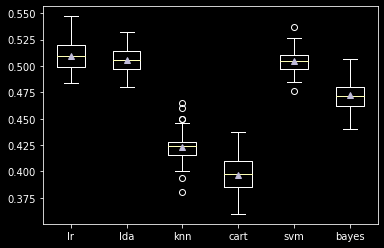

In [65]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr 0.508 (0.014)
>lda 0.505 (0.012)
>knn 0.429 (0.014)
>cart 0.397 (0.017)
>svm 0.509 (0.013)
>bayes 0.473 (0.015)


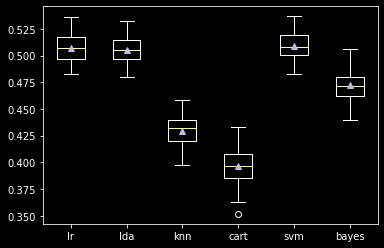

In [66]:
# scaled X

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_scaled, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [67]:
X

,DiffEloOld,DiffAttackOld,DiffDefendOld,PDiff3Matches,PDiff10Matches,PQuotAllMatches,MarketValueDiff,DirectComparisonHG,DirectComparisonAG
90,10.206248,-0.790160,2.735138,3.0,2.0,1.166667,53.05,1.3,1.7
91,-18.300659,-0.044881,-2.152344,-6.0,-5.0,0.615385,-19.87,0.9,0.7
92,-34.677451,-2.431904,-0.756095,-5.0,-7.0,0.650000,-91.80,1.2,2.8
93,44.494676,2.776786,-0.139413,3.0,9.0,2.000000,-4.75,2.1,1.0
94,89.795027,1.876188,0.211856,3.0,10.0,2.428571,134.88,1.6,0.9
...,...,...,...,...,...,...,...,...,...
4891,5.106425,1.215809,-0.215011,4.0,1.0,1.097561,-130.75,1.0,1.0
4892,22.074235,-0.013209,2.041610,4.0,7.0,0.913043,92.35,1.6,1.4
4893,-27.347735,-0.913907,-0.445764,-4.0,-6.0,0.576923,92.97,1.4,1.0
4894,356.589890,0.812772,1.160533,1.0,7.0,1.285714,40.90,1.8,1.1


### Stack the single models to a combination

In [68]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('lda', LinearDiscriminantAnalysis()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model


In [69]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['lda'] = LinearDiscriminantAnalysis()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models


>lr 0.510 (0.013)
>lda 0.505 (0.012)
>knn 0.423 (0.016)
>cart 0.398 (0.017)
>svm 0.504 (0.012)
>bayes 0.473 (0.015)
>stacking 0.508 (0.014)


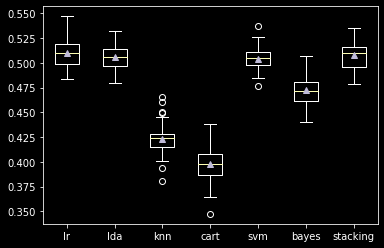

In [70]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Neural Network

In [71]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [72]:
# X = match_data_unfiltered.loc[:, [
#     "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
#     "AwayAttackOld", "AwayDefendOld"
# ]]

# y = match_data_unfiltered.loc[:, ["FTR"]]
# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y,
#                                                     test_size=0.33,
#                                                     random_state=42)
# X_train = X
# y_train = y

print(X_train.shape)
print(X_test.shape)


(2315, 9)
(1141, 9)


In [73]:
y_train

,FTR
4689,2
3551,0
1968,1
1772,2
2632,0
...,...
1635,2
1670,2
1834,2
1220,1


In [74]:
def one_hot_encode_outputs(y_train, y_test):
    # one hot encode outputs
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    count_classes = y_test.shape[1]
    print(count_classes)
    return y_train, y_test

In [75]:
def train_model(X_train, y_train, number_of_epochs=20):
    model = Sequential()
    # model.add(Dense(500, activation='relu', input_dim=6))
    # model.add(Dense(100, activation='relu'))
    # model.add(Dense(50, activation='relu'))
    # model.add(Dense(3, activation='softmax'))

    model.add(Dense(500, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    # build the model
    history = model.fit(X_train, y_train, epochs=number_of_epochs)
    return history, model

In [76]:
def print_accuracy(X_train, y_train, X_test, y_test, model):
    pred_train= model.predict(X_train)
    scores = model.evaluate(X_train, y_train, verbose=0)
    print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
    
    pred_test= model.predict(X_test)
    scores2 = model.evaluate(X_test, y_test, verbose=0)
    print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))  
    return pred_train, pred_test

In [77]:
def get_predictions(pred_test, y_test):
    # y_pred = [[1 if np.max(j)==i for i in j else 0] for j in pred_test]
    y_pred = []
    alpha = 0.05
    beta = 0.1
    for test in pred_test:
        # list_temp = []
        # for counter, j in enumerate(test):
        #     if np.max(test)==j:
        #         y_pred.append(counter)
        # print(test[1])
        if test[2] > test[1] and test[2] > test[0] and abs(test[2] - test[0]) > alpha:
            # if test[2] > test[1]+alpha and test[2] > test[0]:

            y_pred.append(2)
        elif test[0] > test[1] and abs(test[2] - test[0]) > alpha:
            y_pred.append(0)
        else:
            y_pred.append(1)
            #     list_temp.append(1)
            # else:
            #     list_temp.append(0)
        # y_pred.append(list_temp)
    y_pred
    y_test_res = []
    for test in y_test:
        # list_temp = []
        for counter, j in enumerate(test):
            if np.max(test)==j:
                y_test_res.append(counter)
    return y_test_res, y_pred

In [78]:
def print_confusion_matrix(y_test_res, y_pred):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    cf = confusion_matrix(y_test_res, y_pred) #, labels=["Draw", "Home", "Away"])
    cfd = ConfusionMatrixDisplay(cf, display_labels=["Away", "Draw", "Home"])
    cfd.plot(cmap=plt.cm.Blues)

### test first NN with random data

3
Epoch 1/15
73/73 [==============================] - 1s 3ms/step - loss: 2.7207 - accuracy: 0.4013
Epoch 2/15
73/73 [==============================] - 0s 3ms/step - loss: 1.3240 - accuracy: 0.4406: 0s - loss: 1.3948 - accuracy: 0.
Epoch 3/15
73/73 [==============================] - 0s 3ms/step - loss: 1.3498 - accuracy: 0.4423
Epoch 4/15
73/73 [==============================] - 0s 3ms/step - loss: 1.2525 - accuracy: 0.4458
Epoch 5/15
73/73 [==============================] - 0s 3ms/step - loss: 1.1759 - accuracy: 0.4691
Epoch 6/15
73/73 [==============================] - 0s 3ms/step - loss: 1.1210 - accuracy: 0.4665
Epoch 7/15
73/73 [==============================] - 0s 2ms/step - loss: 1.0797 - accuracy: 0.4812
Epoch 8/15
73/73 [==============================] - 0s 3ms/step - loss: 1.0436 - accuracy: 0.5002
Epoch 9/15
73/73 [==============================] - 0s 3ms/step - loss: 1.0545 - accuracy: 0.4851
Epoch 10/15
73/73 [==============================] - 0s 3ms/step - loss: 1.0288 - 

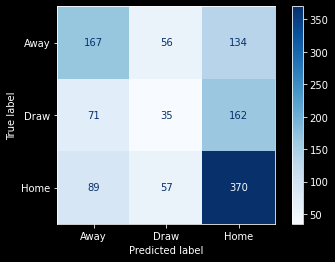

In [79]:
# learn model with random split for train test data
y_train, y_test = one_hot_encode_outputs(y_train, y_test)
trained_model_history, model = train_model(X_train, y_train, number_of_epochs=15)
pred_train, pred_test = print_accuracy(X_train, y_train, X_test, y_test, model)
y_test_res, y_pred = get_predictions(pred_test, y_test)
print_confusion_matrix(y_test_res, y_pred)

Epoch 1/15
73/73 [==============================] - 1s 3ms/step - loss: 1.0222 - accuracy: 0.4916
Epoch 2/15
73/73 [==============================] - 0s 3ms/step - loss: 1.0071 - accuracy: 0.5089
Epoch 3/15
73/73 [==============================] - ETA: 0s - loss: 1.0045 - accuracy: 0.51 - 0s 3ms/step - loss: 1.0066 - accuracy: 0.5127
Epoch 4/15
73/73 [==============================] - 0s 2ms/step - loss: 0.9951 - accuracy: 0.5127
Epoch 5/15
73/73 [==============================] - 0s 2ms/step - loss: 0.9884 - accuracy: 0.5201
Epoch 6/15
73/73 [==============================] - 0s 2ms/step - loss: 0.9847 - accuracy: 0.5201
Epoch 7/15
73/73 [==============================] - 0s 2ms/step - loss: 0.9787 - accuracy: 0.5257
Epoch 8/15
73/73 [==============================] - 0s 3ms/step - loss: 0.9719 - accuracy: 0.5292
Epoch 9/15
73/73 [==============================] - 0s 3ms/step - loss: 0.9669 - accuracy: 0.5352
Epoch 10/15
73/73 [==============================] - 0s 3ms/step - loss: 0.9

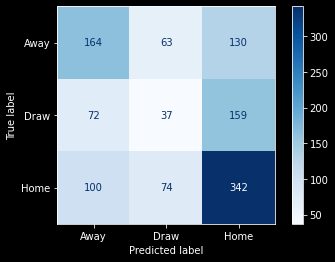

In [80]:
# X scaled

# learn model with random split for train test data
# y_train, y_test = one_hot_encode_outputs(y_train, y_test)
trained_model_history, model = train_model(X_train_scaled,
                                           y_train,
                                           number_of_epochs=15)
pred_train, pred_test = print_accuracy(X_train_scaled, y_train, X_test_scaled, y_test, model)
y_test_res, y_pred = get_predictions(pred_test, y_test)
print_confusion_matrix(y_test_res, y_pred)

In [81]:
X_scaled

array([[ 0.06230872, -0.53728222,  2.49085037, ...,  0.28628604,
        -0.14958268,  0.35082572],
       [-0.06853286,  0.04519897, -1.80222433, ..., -0.09777059,
        -0.76663075, -1.1333571 ],
       [-0.14369939, -1.82040555, -0.57578509, ..., -0.47661307,
        -0.3038447 ,  1.98342681],
       ...,
       [-0.11005731, -0.63399797, -0.30319594, ...,  0.49653756,
         0.00467934, -0.68810225],
       [ 1.65214734,  0.71550757,  1.10774606, ...,  0.22229416,
         0.62172741, -0.53968397],
       [-1.32953057, -0.16110993,  0.91527541, ..., -2.96966308,
        -1.2294168 ,  2.28026337]])

### test first NN with last season data

In [82]:
# split train test data to predict one season
# take the last 306 - 10*9 datapoints (because first 10 Matches are needed for the form)

X_train_s_2022, X_test_s_2022 = X.iloc[:-216], X.iloc[-216:]
y_train_s_2022, y_test_s_2022 = y[:-216], y[-216:]
match_data_bl_wo_nan_s_2022 = match_data_bl_wo_nan.iloc[-216:]

3
Epoch 1/15
102/102 [==============================] - 1s 2ms/step - loss: 1.9696 - accuracy: 0.4247
Epoch 2/15
102/102 [==============================] - 0s 3ms/step - loss: 1.3105 - accuracy: 0.4481
Epoch 3/15
102/102 [==============================] - 0s 3ms/step - loss: 1.1914 - accuracy: 0.4651
Epoch 4/15
102/102 [==============================] - 0s 2ms/step - loss: 1.0626 - accuracy: 0.4843
Epoch 5/15
102/102 [==============================] - 0s 2ms/step - loss: 1.0727 - accuracy: 0.4784
Epoch 6/15
102/102 [==============================] - 0s 4ms/step - loss: 1.0793 - accuracy: 0.4852: 0s - loss: 1.0767 - accura
Epoch 7/15
102/102 [==============================] - 0s 3ms/step - loss: 1.0745 - accuracy: 0.4914
Epoch 8/15
102/102 [==============================] - 0s 2ms/step - loss: 1.0243 - accuracy: 0.5049
Epoch 9/15
102/102 [==============================] - ETA: 0s - loss: 1.0400 - accuracy: 0.48 - 0s 2ms/step - loss: 1.0368 - accuracy: 0.4910
Epoch 10/15
102/102 [=======

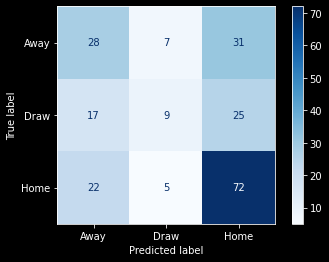

In [83]:
# train model and get results for one season predictions 
y_train_s_2022, y_test_s_2022 = one_hot_encode_outputs(y_train_s_2022, y_test_s_2022)
trained_model_history_s_2022, model_s_2022 = train_model(X_train_s_2022, y_train_s_2022, number_of_epochs=15)
pred_train_s_2022, pred_test_s_2022 = print_accuracy(X_train_s_2022, y_train_s_2022, X_test_s_2022, y_test_s_2022, model_s_2022)
y_test_res_s_2022, y_pred_s_2022 = get_predictions(pred_test_s_2022, y_test_s_2022)
print_confusion_matrix(y_test_res_s_2022, y_pred_s_2022)

In [84]:
# X scaled

# split train test data to predict one season
# take the last 306 - 10*9 datapoints (because first 10 Matches are needed for the form)

X_train_s_2022_scaled, X_test_s_2022_scaled = X_scaled[:-216], X_scaled[-216:]
y_train_s_2022, y_test_s_2022 = y[:-216], y[-216:]
match_data_bl_wo_nan_s_2022 = match_data_bl_wo_nan.iloc[-216:]

In [85]:
# combine match data for season 22 with predictions for season 2022 for betting strategy

match_data_bl_wo_nan_s_2022.loc[:,'predictedResults'] = y_pred_s_2022
match_data_bl_wo_nan_s_2022

C:\Users\Phili\AppData\Local\Temp/ipykernel_17024/1960349365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_data_bl_wo_nan_s_2022.loc[:,'predictedResults'] = y_pred_s_2022


,Unnamed: 0.2,index,Unnamed: 0.1,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,...,QuotDefend,DirectComparisonHG,DirectComparisonAG,B365Prediction,BetTrue,IWPrediction,BetTrueIW,DirectComparisonGoalDiff,DirectComparisonGoalQuot,predictedResults
4680,4680,4680,4680,D1,05/11/2021,Mainz,M'gladbach,1,1,1,...,1.438142,1.2,2.20,A,False,A,False,-1.00,0.545455,0
4681,4681,4681,4681,D1,06/11/2021,Bayern Munich,Freiburg,2,1,2,...,0.937499,2.2,1.20,H,True,H,True,1.00,1.833333,2
4682,4682,4682,4682,D1,06/11/2021,Bochum,Hoffenheim,2,0,2,...,0.395446,1.5,1.75,A,False,A,False,-0.25,0.857143,0
4683,4683,4683,4683,D1,06/11/2021,Stuttgart,Bielefeld,0,1,0,...,1.455523,0.8,1.80,H,False,H,False,-1.00,0.444444,2
4684,4684,4684,4684,D1,06/11/2021,Wolfsburg,Augsburg,1,0,2,...,0.297315,2.4,0.40,H,True,H,True,2.00,6.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,4891,4891,4891,D1,14/05/2022,Mainz,Ein Frankfurt,2,2,1,...,1.191627,1.0,1.00,H,False,H,False,0.00,1.000000,1
4892,4892,4892,4892,D1,14/05/2022,M'gladbach,Hoffenheim,5,1,2,...,0.266797,1.6,1.40,H,True,H,True,0.20,1.142857,2
4893,4893,4893,4893,D1,14/05/2022,Stuttgart,FC Koln,2,1,2,...,0.803116,1.4,1.00,H,True,H,True,0.40,1.400000,2
4894,4894,4894,4894,D1,14/05/2022,Union Berlin,Bochum,3,2,2,...,0.532022,1.8,1.10,H,True,H,True,0.70,1.636364,2


In [86]:
df_season_2022_percentage_res = pd.DataFrame(pred_test_s_2022, columns=['ProbAwayWin', 'ProbDraw', 'ProbHomeWin'], index=match_data_bl_wo_nan_s_2022.index)
match_data_bl_wo_nan_s_2022.loc[:, ['ProbAwayWin', 'ProbDraw', 'ProbHomeWin']] = df_season_2022_percentage_res
match_data_bl_wo_nan_s_2022

C:\Users\Phili\AppData\Local\Temp/ipykernel_17024/2965493251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_data_bl_wo_nan_s_2022.loc[:, ['ProbAwayWin', 'ProbDraw', 'ProbHomeWin']] = df_season_2022_percentage_res


,Unnamed: 0.2,index,Unnamed: 0.1,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,...,B365Prediction,BetTrue,IWPrediction,BetTrueIW,DirectComparisonGoalDiff,DirectComparisonGoalQuot,predictedResults,ProbAwayWin,ProbDraw,ProbHomeWin
4680,4680,4680,4680,D1,05/11/2021,Mainz,M'gladbach,1,1,1,...,A,False,A,False,-1.00,0.545455,0,0.520480,0.186649,0.292871
4681,4681,4681,4681,D1,06/11/2021,Bayern Munich,Freiburg,2,1,2,...,H,True,H,True,1.00,1.833333,2,0.092276,0.091714,0.816010
4682,4682,4682,4682,D1,06/11/2021,Bochum,Hoffenheim,2,0,2,...,A,False,A,False,-0.25,0.857143,0,0.445549,0.289820,0.264632
4683,4683,4683,4683,D1,06/11/2021,Stuttgart,Bielefeld,0,1,0,...,H,False,H,False,-1.00,0.444444,2,0.182792,0.317834,0.499374
4684,4684,4684,4684,D1,06/11/2021,Wolfsburg,Augsburg,1,0,2,...,H,True,H,True,2.00,6.000000,2,0.214845,0.218437,0.566718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,4891,4891,4891,D1,14/05/2022,Mainz,Ein Frankfurt,2,2,1,...,H,False,H,False,0.00,1.000000,1,0.347137,0.266804,0.386059
4892,4892,4892,4892,D1,14/05/2022,M'gladbach,Hoffenheim,5,1,2,...,H,True,H,True,0.20,1.142857,2,0.206253,0.242675,0.551071
4893,4893,4893,4893,D1,14/05/2022,Stuttgart,FC Koln,2,1,2,...,H,True,H,True,0.40,1.400000,2,0.271380,0.295997,0.432624
4894,4894,4894,4894,D1,14/05/2022,Union Berlin,Bochum,3,2,2,...,H,True,H,True,0.70,1.636364,2,0.189506,0.317214,0.493280


In [87]:
match_data_bl_wo_nan_s_2022.to_csv("./match_data_bl_wo_nan_s_2022.csv")

In [88]:
df_season_2022_percentage_res

,ProbAwayWin,ProbDraw,ProbHomeWin
4680,0.520480,0.186649,0.292871
4681,0.092276,0.091714,0.816010
4682,0.445549,0.289820,0.264632
4683,0.182792,0.317834,0.499374
4684,0.214845,0.218437,0.566718
...,...,...,...
4891,0.347137,0.266804,0.386059
4892,0.206253,0.242675,0.551071
4893,0.271380,0.295997,0.432624
4894,0.189506,0.317214,0.493280


In [89]:
# class_names = {
#     'Away'
#     ,'Draw',
#     'Home'
# }
# # Plot non-normalized confusion matrix
# titles_options = [
#     ("Confusion matrix, without normalization", None),
#     ("Normalized confusion matrix", "true"),
# ]
# for title, normalize in titles_options:
#     disp = ConfusionMatrixDisplay.from_estimator(
# models['lr'],
#         X_test,
#         y_test,
#         #display_labels=class_names,
#         cmap=plt.cm.Blues,
#         normalize=normalize,
#     )
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# plt.show()

In [90]:
X

,DiffEloOld,DiffAttackOld,DiffDefendOld,PDiff3Matches,PDiff10Matches,PQuotAllMatches,MarketValueDiff,DirectComparisonHG,DirectComparisonAG
90,10.206248,-0.790160,2.735138,3.0,2.0,1.166667,53.05,1.3,1.7
91,-18.300659,-0.044881,-2.152344,-6.0,-5.0,0.615385,-19.87,0.9,0.7
92,-34.677451,-2.431904,-0.756095,-5.0,-7.0,0.650000,-91.80,1.2,2.8
93,44.494676,2.776786,-0.139413,3.0,9.0,2.000000,-4.75,2.1,1.0
94,89.795027,1.876188,0.211856,3.0,10.0,2.428571,134.88,1.6,0.9
...,...,...,...,...,...,...,...,...,...
4891,5.106425,1.215809,-0.215011,4.0,1.0,1.097561,-130.75,1.0,1.0
4892,22.074235,-0.013209,2.041610,4.0,7.0,0.913043,92.35,1.6,1.4
4893,-27.347735,-0.913907,-0.445764,-4.0,-6.0,0.576923,92.97,1.4,1.0
4894,356.589890,0.812772,1.160533,1.0,7.0,1.285714,40.90,1.8,1.1


## Train second NN

In [91]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras import backend, callbacks
#create model
model = Sequential()

#get number of columns in training data
n_cols_2 = X.shape[1]
print(n_cols_2)
y = to_categorical(y)
#add layers to model
model.add(Dense(500, activation='sigmoid', input_dim=n_cols_2))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

#compile model using accuracy to measure model performance
# model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy', 'mse'], metrics=['accuracy'])
model.compile(metrics=['accuracy'], optimizer='rmsprop', 
              loss='categorical_crossentropy')
# K.set_value(model.optimizer.learning_rate, 0.01)

# early_stopping_monitor = EarlyStopping(patience=3)

# es = callbacks.EarlyStopping(monitor='val_loss', 
#                                    mode='min',
#                                    patience=10, 
#                                    restore_best_weights=True) 


history = model.fit(X, y,  epochs=20, validation_split=0.3) #, callbacks=[early_stopping_monitor]) #callbacks=[es],

9
Epoch 1/20
76/76 [==============================] - 1s 8ms/step - loss: 1.0633 - accuracy: 0.4680 - val_loss: 1.0415 - val_accuracy: 0.4851
Epoch 2/20
76/76 [==============================] - 0s 3ms/step - loss: 1.0301 - accuracy: 0.4919 - val_loss: 1.0475 - val_accuracy: 0.5198
Epoch 3/20
76/76 [==============================] - 0s 4ms/step - loss: 1.0224 - accuracy: 0.5014 - val_loss: 1.0257 - val_accuracy: 0.5024
Epoch 4/20
76/76 [==============================] - 0s 4ms/step - loss: 1.0193 - accuracy: 0.5081 - val_loss: 1.0672 - val_accuracy: 0.5169
Epoch 5/20
76/76 [==============================] - 0s 4ms/step - loss: 1.0164 - accuracy: 0.5019 - val_loss: 1.0285 - val_accuracy: 0.5043
Epoch 6/20
76/76 [==============================] - 0s 4ms/step - loss: 1.0113 - accuracy: 0.5031 - val_loss: 1.0438 - val_accuracy: 0.5024
Epoch 7/20
76/76 [==============================] - 0s 4ms/step - loss: 1.0128 - accuracy: 0.4998 - val_loss: 1.0408 - val_accuracy: 0.4976
Epoch 8/20
76/76 [

In [92]:
import keras_tuner as kt
from tensorflow import keras
from kerastuner.tuners import RandomSearch
# import tensorflow.keras import layers


def build_model(hp):
    model = keras.Sequential()
    # model.add(Dense(keras.layers.Flatten(input_dim=n_cols_2)))
    model.add(keras.layers.Flatten())
    # model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=128), activation=hp.Choice("activation", ["relu", "tanh"]), input_dim=n_cols_2))
    for i in range(hp.Int('layers', 2, 6)):
        model.add(keras.layers.Dense(
            units=hp.Int('units_' + str(i), 50, 100, step=10),
            activation=hp.Choice('act_' + str(i), ['relu', 'sigmoid'])))
    model.add(keras.layers.Dense(3, activation='softmax'))
    model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=50,
    executions_per_trial=4,
    directory='my_dir2',
    project_name='data_exploration'
)

tuner.search_space_summary()

tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 50 Complete [00h 00m 11s]
val_accuracy: 0.5256354212760925

Best val_accuracy So Far: 0.5315512716770172
Total elapsed time: 00h 08m 59s
INFO:tensorflow:Oracle triggered exit


In [93]:
tuner.results_summary()

Results summary
Results in my_dir2\data_exploration
Showing 10 best trials
Trial summary
Hyperparameters:
layers: 4
units_0: 80
act_0: sigmoid
units_1: 80
act_1: relu
units_2: 80
act_2: relu
units_3: 80
act_3: relu
units_4: 50
act_4: relu
units_5: 70
act_5: sigmoid
Score: 0.5315512716770172
Trial summary
Hyperparameters:
layers: 5
units_0: 90
act_0: sigmoid
units_1: 60
act_1: relu
units_2: 60
act_2: sigmoid
units_3: 70
act_3: sigmoid
units_4: 60
act_4: relu
units_5: 70
act_5: relu
Score: 0.5304557532072067
Trial summary
Hyperparameters:
layers: 4
units_0: 90
act_0: relu
units_1: 60
act_1: sigmoid
units_2: 50
act_2: relu
units_3: 70
act_3: sigmoid
units_4: 60
act_4: relu
units_5: 90
act_5: sigmoid
Score: 0.5302366465330124
Trial summary
Hyperparameters:
layers: 3
units_0: 70
act_0: relu
units_1: 70
act_1: sigmoid
units_2: 60
act_2: sigmoid
units_3: 60
act_3: relu
units_4: 70
act_4: relu
units_5: 70
act_5: sigmoid
Score: 0.5302366316318512
Trial summary
Hyperparameters:
layers: 2
units_0

In [94]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=50,
    executions_per_trial=4,
    directory='my_dir_scaled_2',
    project_name='data_exploration'
)

tuner.search_space_summary()

# tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

tuner.search(X_train_scaled, y_train, epochs=5, validation_data=(X_test_scaled, y_test))

INFO:tensorflow:Reloading Oracle from existing project my_dir_scaled_2\data_exploration\oracle.json
INFO:tensorflow:Reloading Tuner from my_dir_scaled_2\data_exploration\tuner0.json
Search space summary
Default search space size: 13
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 10, 'sampling': None}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 10, 'sampling': None}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 10, 'sampling': None}
act_2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
units_

In [95]:
tuner.results_summary()

Results summary
Results in my_dir_scaled_2\data_exploration
Showing 10 best trials
Trial summary
Hyperparameters:
layers: 4
units_0: 80
act_0: relu
units_1: 100
act_1: relu
units_2: 50
act_2: sigmoid
units_3: 80
act_3: sigmoid
units_4: 80
act_4: relu
units_5: 90
act_5: sigmoid
Score: 0.5241016745567322
Trial summary
Hyperparameters:
layers: 2
units_0: 100
act_0: relu
units_1: 60
act_1: relu
units_2: 60
act_2: sigmoid
units_3: 70
act_3: sigmoid
units_4: 60
act_4: relu
units_5: 60
act_5: relu
Score: 0.5232252478599548
Trial summary
Hyperparameters:
layers: 6
units_0: 60
act_0: relu
units_1: 50
act_1: relu
units_2: 70
act_2: relu
units_3: 50
act_3: sigmoid
units_4: 80
act_4: relu
units_5: 50
act_5: sigmoid
Score: 0.5230061411857605
Trial summary
Hyperparameters:
layers: 5
units_0: 70
act_0: relu
units_1: 50
act_1: sigmoid
units_2: 90
act_2: relu
units_3: 60
act_3: relu
units_4: 80
act_4: relu
Score: 0.5219106078147888
Trial summary
Hyperparameters:
layers: 5
units_0: 50
act_0: sigmoid
uni

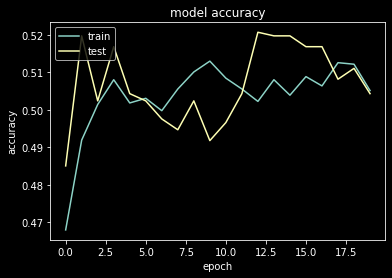

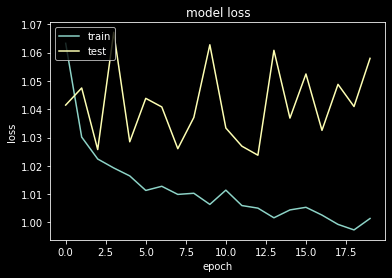

In [96]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()

# summarize history for loss

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()